In [1]:
%run MakeDataset.py

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [2]:
from MakeDataset import X_train,X_test,y_train,y_test

print(X_train)
print(y_train)

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
[[[ 1.19648    -0.1606898  -0.740178  ]
  [ 1.22203    -0.2672951  -0.7717485 ]
  [ 1.22311    -0.4338634  -0.7678422 ]
  ...
  [ 0.4974957  -0.2795907  -0.2029592 ]
  [ 0.5064167  -0.286091   -0.2564634 ]
  [ 0.5609918  -0.302237   -0.2553743 ]]

 [[ 0.253887    0.6446213   0.7305601 ]
  [ 0.2547409   0.6470096   0.7330282 ]
  [ 0.256914    0.6468081   0.7354798 ]
  ...
  [ 0.2489302   0.642803    0.7323693 ]
  [ 0.2503708   0.6447095   0.7369245 ]
  [ 0.2513104   0.6440663   0.735841  ]]

 [[ 0.9736077  -0.1844755  -0.2821974 ]
  [ 0.9760866  -0.1867793  -0.2848794 ]
  [ 0.977865   -0.191836   -0.2891687 ]
  ...
  [ 0.9779202  -0.1834941  -0.2829651 ]
  [ 0.9796224  -0.1832831  -0.279844  ]
  [ 0.9775468  -0.1833646  -0.2764387 ]]

 ...

 [[ 0.1943966   0.5317094   0.834933  ]
  [ 0.1938159   0.5319046   0.8337903 ]
  [ 0.1907567   0.5332984   0.8291312 ]
  ...
  [ 0.188955    0.5606699   0.8099954 ]
  [ 0.186853  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
import tsfel

In [5]:
activity = {
    1: "WALKING",
    2: "WALKING UPSTAIRS",
    3: "WALKING DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

## Q1

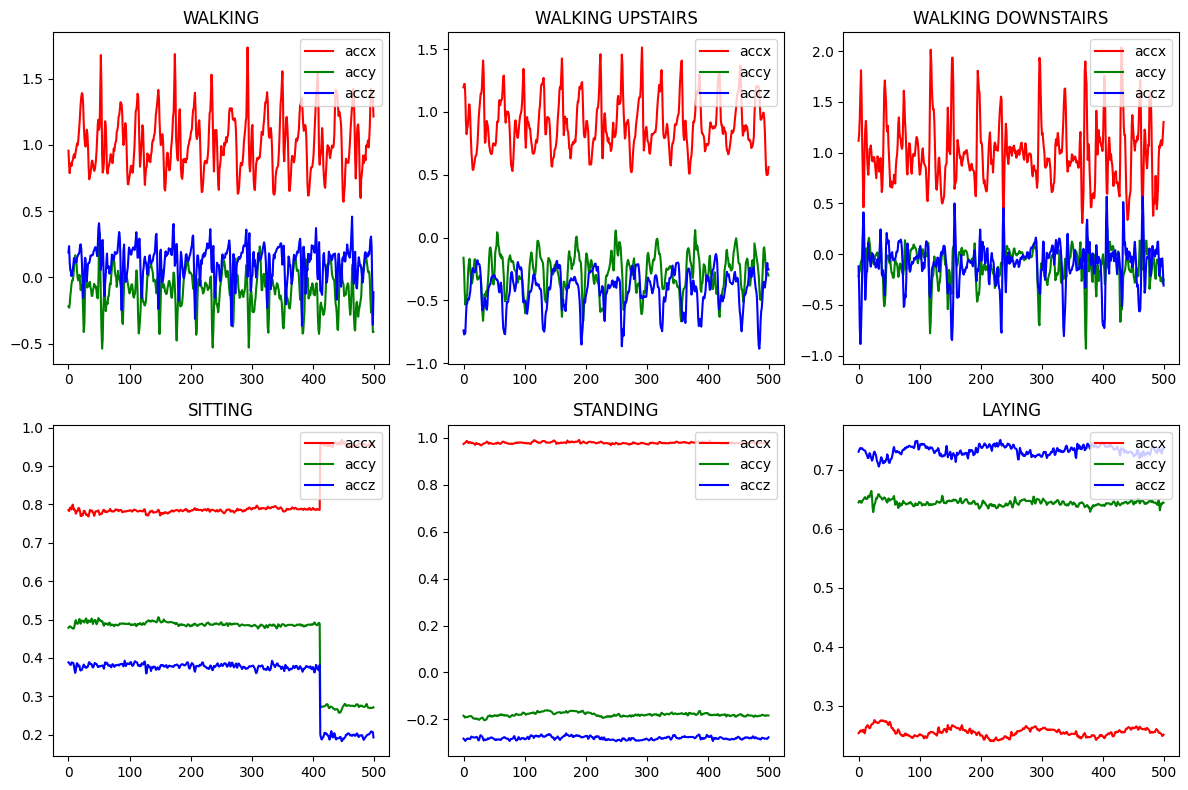

In [6]:
activity_classes = np.unique(y_train)

color_accx = 'red'
color_accy = 'green'
color_accz = 'blue'

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, index in enumerate(activity_classes):
    waveform = X_train[y_train == index][0]
    row = i // 3
    col = i % 3
    axes[row, col].plot(waveform[:, 0], label='accx', color=color_accx)
    axes[row, col].plot(waveform[:, 1], label='accy', color=color_accy)
    axes[row, col].plot(waveform[:, 2], label='accz', color=color_accz)
    axes[row, col].set_title(activity[index])
    axes[row, col].legend(loc='upper right') 

plt.tight_layout()
plt.show()

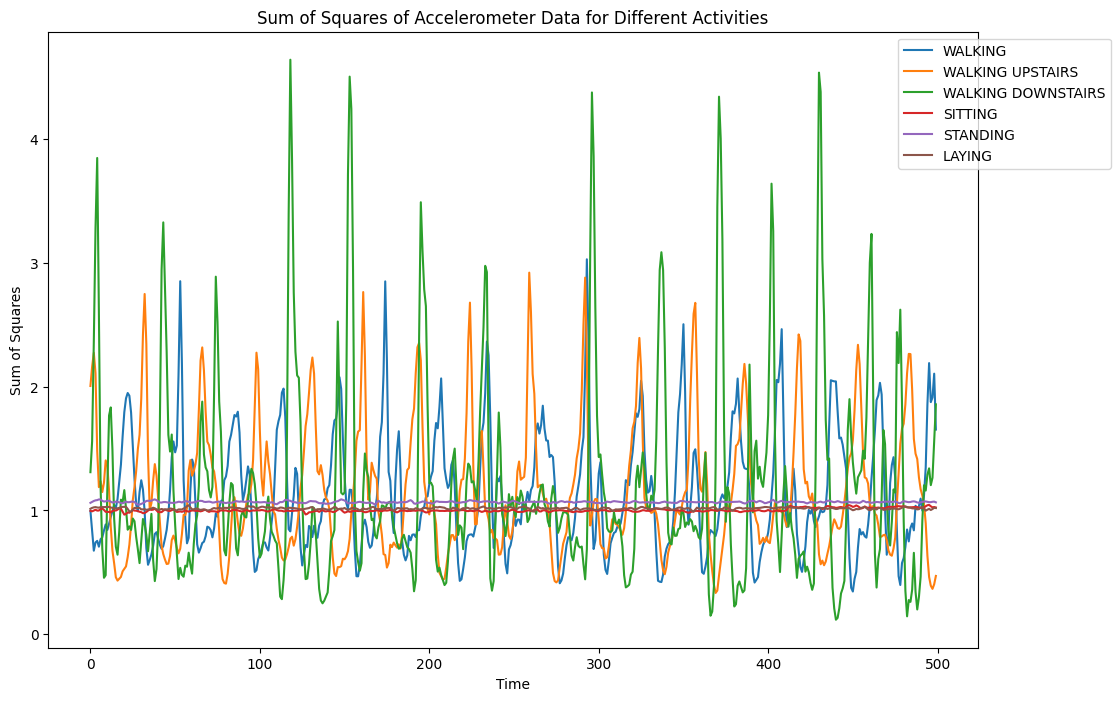

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

for i, index in enumerate(activity_classes):
    waveform = X_train[y_train == index][0]

    sum_of_squares = np.sum(waveform**2, axis=1)

    ax.plot(sum_of_squares, label=activity[index])

ax.set_title('Sum of Squares of Accelerometer Data for Different Activities')
ax.set_xlabel('Time')
ax.set_ylabel('Sum of Squares')

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

plt.show()

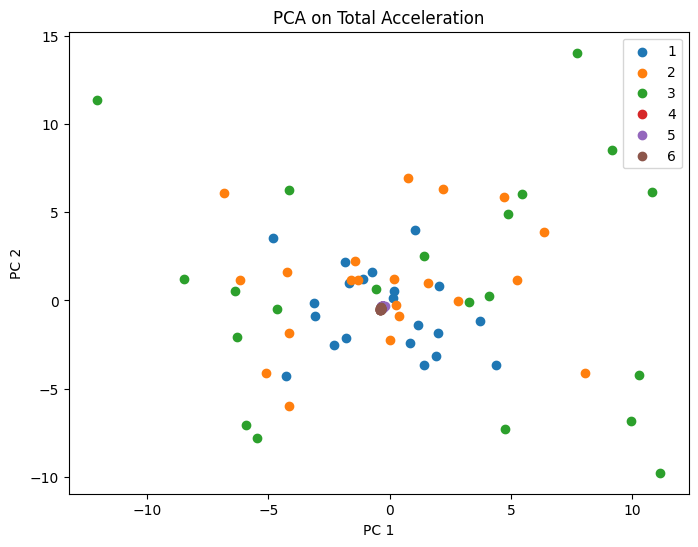

In [8]:
X_train_total_acc = np.sum(X_train**2, axis=2)
data_with_labels = np.column_stack((X_train_total_acc, y_train))

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(data_with_labels)

plt.figure(figsize=(8, 6))
for activity in np.unique(y_train):
    indices = np.where(y_train == activity)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=activity)
plt.title('PCA on Total Acceleration')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

In [9]:
print(X_train_total_acc.shape)

(126, 500)


In [10]:
cfg = tsfel.get_features_by_domain()
# X_tsfel = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_tsfel = []
feature_names = []
for i in range(X_train_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_train_total_acc[i], fs=50)
    X_tsfel.append(X_tsf.values)
    if feature_names == []:
        feature_names = X_tsf.columns.tolist()
X_tsfel = np.vstack(X_tsfel)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [11]:
X_tsfel_df = pd.DataFrame(X_tsfel, columns=feature_names)
corr_features = tsfel.correlated_features(X_tsfel_df)
X_tsfel_df.drop(corr_features, axis=1, inplace=True)

In [12]:
selector = VarianceThreshold()
X_tsfel_df_var = selector.fit_transform(X_tsfel_df)

In [13]:
kbest_selector = SelectKBest(score_func=f_classif, k=10)
X_tsfel_df_k = kbest_selector.fit_transform(X_tsfel_df_var, y_train)

In [14]:
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_tsfel_df_k)

In [15]:
print(nX_train.shape)

(126, 10)
